In this project, I have some fun graphing and animating a differential system of equations called the Lorenz System. The Lorenz System is well known because it is relatively simple, yet it demonstrates chaos. I will show how essentially all points are attracted to the two basins of attraction, and how changing the initial conditions by a miniscule amount eventually results in very different outcomes.

## The Lorenz System
One of the first examples of a chaotic system was discovered by Edward Lorenz, which is now known as the Lorenz system.
Edward Lorenz was attempting to develop a simplified model of weather systems using differential equations, and after much simplification, he arrived at this set of equations:

$$\begin{align}
\frac{\partial x}{\partial t} &= \sigma (y-x) \\
\frac{\partial x}{\partial t} &= \rho x - y - xz \\
\frac{\partial x}{\partial t} &= xy - \beta z  \\
\end{align}$$

where $$\sigma$$, $$\rho$$, and $$\beta$$ are all constants. When these constants are chosen appropriately, the system will demonstrate a type of chaotic behavior. It will not tend toward any one point, but rather it will tend toward the two spirals which are called the basins of attraction. Below I implement the Lorenz System exactly as described in the above equations.

In [8]:
import numpy as np
from matplotlib import rcParams, pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.switch_backend('qt5agg')
%matplotlib inline

def lorenz_ode(coordinates, time):
    x, y, z = coordinates
    Xprime = sigma*(y - x)
    Yprime = rho*x - y - x*z
    Zprime = x*y - beta*z
    return Xprime, Yprime, Zprime

Next, we have the solver which uses scipy's odeint to iteratively solve for a particle's path. The odeint function uses the LSODA algorithm which switches automatically between Adam's method and Backward Differential Formula (BDF) method.

In [9]:
from scipy.integrate import odeint

def solve_lorenz(init_cond, time=10, atol=1e-10, rtol=1e-10, res=100):
    '''
    Use odeint in conjunction with lorenz_ode and the time interval T
    To get the X, Y, and Z values for this system.
    You will need to transpose the output of odeint to graph it correctly.
    '''
    T = np.linspace(0, time, int(time*res))
    sol = odeint(lorenz_ode, init_cond, T, atol=atol, rtol=rtol)

    X,Y,Z = sol.T
    X.reshape(-1)
    Y.reshape(-1)
    Z.reshape(-1)
    
    return X,Y,Z

These values for $$\sigma$$, $$\rho$$, and $$\beta$$ produce good results.

In [10]:
sigma = 10
rho = 28
beta = 8/3

In [11]:
# helper function
def initialize_graph():
    #Create a figure and set the window boundaries
    fig = plt.figure(figsize=(12,10))
    ax = fig.gca(projection='3d')
    ax.set_xlim3d([-30, 30])
    ax.set_ylim3d([-30,30])
    ax.set_zlim3d([0,50])
    return fig, ax

## The Basins of Attraction

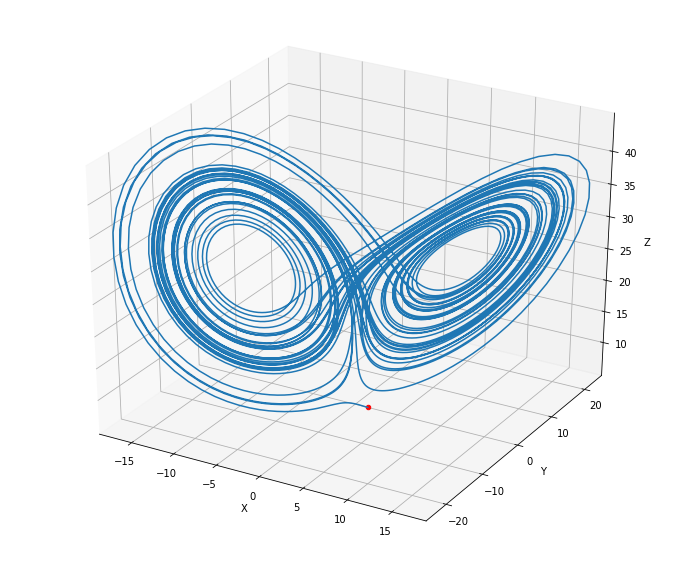

In [15]:
from IPython.display import display,Markdown,HTML

init_cond = (np.random.random(3) - 0.5)*30
X, Y, Z = solve_lorenz(init_cond, 50)

fig, ax = initialize_graph()
ax.scatter(X[0], Y[0], Z[0], c='red')
ax.plot( X, Y, Z )

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim3d([min(X), max(X)])
ax.set_ylim3d([min(Y), max(Y)])
ax.set_zlim3d([min(Z), max(Z)])
display(Markdown("## The Basins of Attraction"))
plt.show()

And here is our first look at the behavior of the Lorenz System. We started with a randomly chosen intial point, marked in red. And there are clear patterns that emerge within the path it traveled. These two spirals are the basins of attraction, or the Lorenz attractors. Despite this semblance of order, the Lorenz System definitely demonstrates chaos. Next we will see how sensitive this system is to minor changes in initial starting points.

## Wait for it...

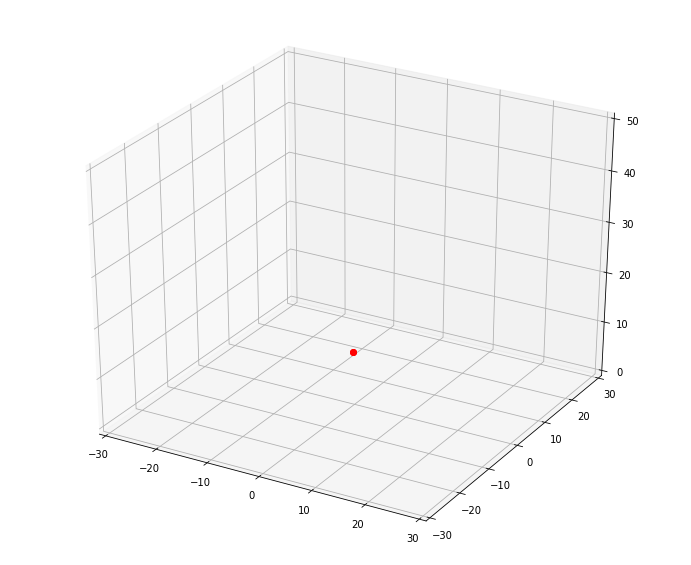

In [7]:
from matplotlib.animation import FuncAnimation

def animate_lorenz_sensitivity():
    #Calculate the data to be animated
    init_cond = (np.random.random(3) - 0.5)*30
    X1, Y1, Z1 = solve_lorenz(init_cond, 45)
        
    init_cond += np.random.randn(3)*(1e-10)
    X2, Y2, Z2 = solve_lorenz(init_cond, 45)
    
    fig, ax = initialize_graph()
    
    #Initiate empty lines of the correct dimension
    lorenz1, = plt.plot([], [], [])
    lorenz2, = plt.plot([], [], []) #note the comma after the variable name
    pt1, = plt.plot([], [], [], 'ro')
    pt2, = plt.plot([], [], [], 'ro')
    
    fps = 30
    
    #Define a function that updates each line
    def update(index):
        index *= 4 #speed up
        lorenz1.set_data(X1[:index+1], Y1[:index+1])
        lorenz1.set_3d_properties(Z1[:index+1])
        pt1.set_data(X1[index], Y1[index])
        pt1.set_3d_properties(Z1[index])

        lorenz2.set_data(X2[:index+1], Y2[:index+1])
        lorenz2.set_3d_properties(Z2[:index+1])
        pt2.set_data(X2[index], Y2[index])        
        pt2.set_3d_properties(Z2[index])
        return lorenz1, lorenz2,
    
    anim = FuncAnimation(fig, update, frames=len(X1)//4, interval=1000/fps)
    return anim

anim = animate_lorenz_sensitivity()
display(Markdown("## Wait for it..."))
HTML(anim.to_html5_video())

At the very start, the two points are so close together that you cannot tell them apart. But they slowly spread apart as they continue winding around the basins of attraction. This sensitivity to intitial conditions makes it impossible to perfectly predict the future path of a point because any rounding error will have significant impact later on. Sensitivity to initial conditions is a key feature of chaotic systems.

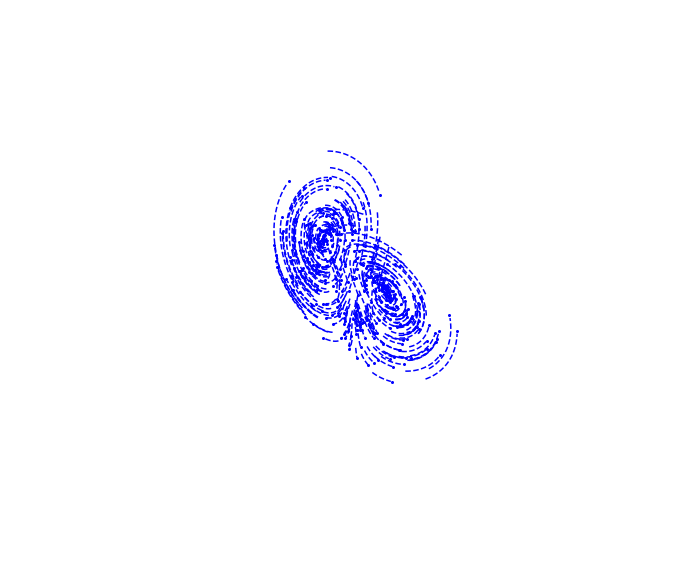

In [9]:
def animate_lorenz_attractors():
    #Calculate the data to be animated
#     init_cond = (np.random.random(3) - 0.5)*30
    x = np.linspace(-30,30,9) + np.random.random()
    points = list(zip(*map(lambda x:x.flatten(), np.meshgrid(x,x,x[x>0]))))
    Xs, Ys, Zs = [],[],[]
    for init_cond in points:
        X, Y, Z = solve_lorenz(init_cond, time=1.5, res=400)
        Xs.append(X)
        Ys.append(Y)
        Zs.append(Z)

    #Create a figure and set the window boundaries
    fig, ax = initialize_graph()
    ax._axis3don = False
    
    #Initiate empty lines of the correct dimension
    paths = []
    markers = []
    for _ in range(len(points)):
        paths.append(plt.plot([], [], [], 'b--')[0])
        markers.append(plt.plot([], [], [], 'bo', ms=2)[0])
    
    fps = 30
    
    #Define a function that updates each line    
    def update(index):
        ax.view_init(azim=0.6*(index+20)) # rotate
        index = max(0, index-fps//2)      # delay start 0.5 seconds
        for i,(path,point) in enumerate(zip(paths,markers)):
            path.set_data(Xs[i][max(0,index-30):index], Ys[i][max(0,index-30):index])
            path.set_3d_properties(Zs[i][max(0,index-30):index])

            point.set_data(Xs[i][index], Ys[i][index])
            point.set_3d_properties(Zs[i][index])
            
        return paths
    
    anim = FuncAnimation(fig, update, frames=len(Xs[0])+fps//2, interval=1000/fps, blit=True)
    return anim
anim = animate_lorenz_attractors()
HTML(anim.to_html5_video())

This animation just helps show the mixing nature of the system. Two points that start out far apart can come close together thanks to the chaotic spreading and mixing that occurs within the basins. Also, this animation is just a lot of fun to watch.

## Results
Dang that looks so cool!